### Numerical Method for Stochastic Differential Equations using Python

2次元Brown粒子は以下の運動方程式に従う．  
$V_i(t) \, (i=1,2)$が従う運動方程式は2次元Langevin方程式．

\begin{align}
dX_i(t) &= V_i(t) dt \\
dV_i(t) &= - \gamma V_i(t) dt + \sigma dW_i(t) \quad (i=1,2)
\end{align}

なお，$\Delta W_i \sim N(0,\Delta t)$である．

In [5]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline

def Langevin2D(iteration, n, interval, dt, gamma, sigma, X1_0, X2_0, V1_0, V2_0):
    
    realtime = np.arange(n+1) * dt
    
    X1_s = []
    X2_s = []
    V1_s = []
    V2_s = []
    
    for i in range(iteration):
        random.seed(i*10) #seedは適当に
        W = random.randn(n, 2)

        X1 = []
        X2 = []
        V1 = []
        V2 = []

        X1.append(X1_0)
        X2.append(X2_0)
        V1.append(V1_0)
        V2.append(V2_0)

        for j in range(n):

            dX1 = V1[j] * dt
            X1.append(X1[j] + dX1)
            dX2 = V2[j] * dt
            X2.append(X2[j] + dX2)

            dV1 = - gamma * V1[j] * dt + sigma * np.sqrt(dt) * W[j,0]
            V1.append(V1[j] + dV1)
            dV2 = - gamma * V2[j] * dt + sigma * np.sqrt(dt) * W[j,1]
            V2.append(V2[j] + dV2)
            
        #iterationごとにX,Yを保存
        
        X1_s.append(X1) #[X1[0], X1[1], ...,X1[n]], 
        X2_s.append(X2)
        V1_s.append(V1)
        V2_s.append(V2)
    
    print('iteration: %d' % iteration)
    print('n: %d' % n)
    print('interval: %d' % interval)
    print('dt: %f' % dt)
    print('gamma: %f' % gamma)
    print('sigma: %f' % sigma)
    print('X_0: ({0}, {1})'.format(X1_0, X2_0))
    print('V_0: ({0}, {1})'.format(V1_0, V2_0))
    print()
    
    arr = np.arange(0, n+1, interval) #[0, 10, 20, 30, ..., 1000]など

    X1_series = np.array(X1_s).T
    X2_series = np.array(X2_s).T
    V1_series = np.array(V1_s).T
    V2_series = np.array(V2_s).T

    time_series = realtime[arr] #時刻

    mean_X1 = np.array([np.mean(i) for i in X1_series[arr] ]) #E[V1]
    mean_X2 = np.array([np.mean(i) for i in X2_series[arr] ]) #E[V2]
    var_X1 = np.array([np.var(i) for i in X1_series[arr] ]) #V[V1]
    var_X2 = np.array([np.var(i) for i in X2_series[arr] ]) #V[V2]
    
    mean_V1 = np.array([np.mean(i) for i in V1_series[arr] ]) #E[V1]
    mean_V2 = np.array([np.mean(i) for i in V2_series[arr] ]) #E[V2]
    var_V1 = np.array([np.var(i) for i in V1_series[arr] ]) #V[V1]
    var_V2 = np.array([np.var(i) for i in V2_series[arr] ]) #V[V2]
      
    plt.figure(figsize=(12,15))

    plt.subplot(3,2,1)
    plt.title('trajectory_X')
    plt.xlabel('X1')
    plt.ylabel('X2')
    for i in range(iteration):
        plt.plot(X1_s[i], X2_s[i])
        plt.plot(X1_s[i][-1], X2_s[i][-1], 'ro') #end
    plt.plot(X1_0, X2_0, 'bo', label='start') #start
    plt.legend()
    
    plt.subplot(3,2,2)
    plt.title('trajectory_V')
    plt.xlabel('V1')
    plt.ylabel('V2')
    for i in range(iteration):
        plt.plot(V1_s[i], V2_s[i])
        plt.plot(V1_s[i][-1], V2_s[i][-1], 'ro') #end
    plt.plot(V1_0, V2_0, 'bo', label='start') #start
    plt.legend()
    
    plt.subplot(3,2,3)
    plt.title('mean_X')
    plt.xlabel('t')
    plt.ylabel('E[X(t)]')
    plt.plot(time_series, mean_X1, '-o', label='X1')
    plt.plot(time_series, mean_X2, '-o', label='X2')
    plt.legend()
    
    plt.subplot(3,2,4)
    plt.title('var_X')
    plt.xlabel('t')
    plt.ylabel('V[X(t)]')
    plt.plot(time_series, var_X1, '-o', label='X1')
    plt.plot(time_series, var_X2, '-o', label='X2')
    plt.legend()
    
    plt.subplot(3,2,5)
    plt.title('mean_V')
    plt.xlabel('t')
    plt.ylabel('E[V(t)]')
    plt.plot(time_series, mean_V1, '-o', label='V1')
    plt.plot(time_series, mean_V2, '-o', label='V2')
    plt.legend()
    
    plt.subplot(3,2,6)
    plt.title('var_V')
    plt.xlabel('t')
    plt.ylabel('V[V(t)]')
    plt.plot(time_series, var_V1, '-o', label='V1')
    plt.plot(time_series, var_V2, '-o', label='V2')
    plt.legend()
    
    plt.show()
    plt.close()

iteration: 100
n: 1000
interval: 10
dt: 0.010000
gamma: 0.500000
sigma: 1.000000
X_0: (0.0, 0.0)
V_0: (1.0, -1.0)



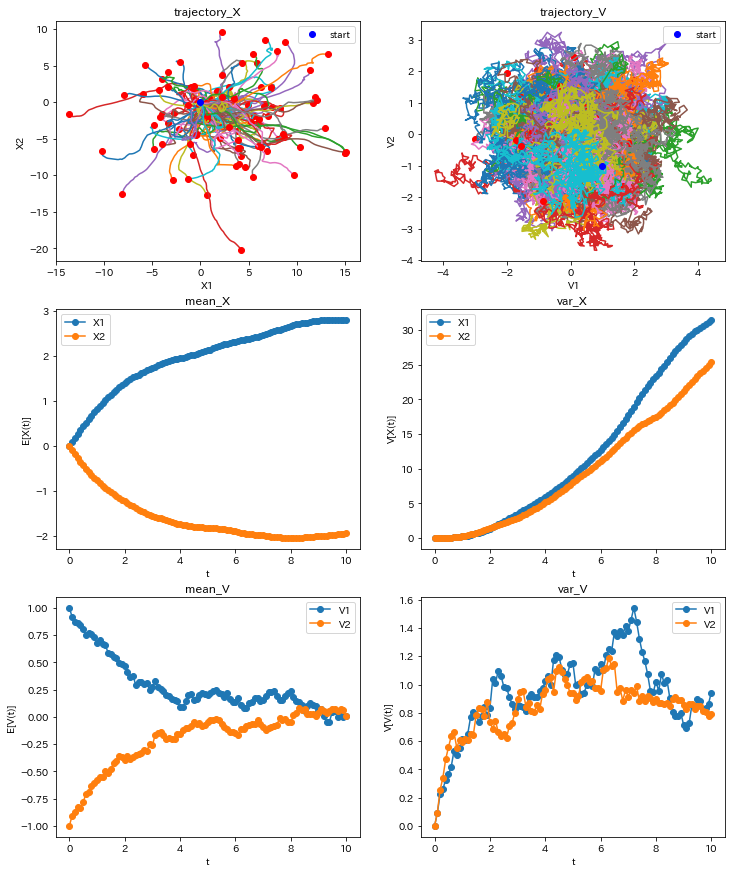

In [7]:
#右下方向に初速度をもつBrown粒子の振る舞い
Langevin2D(100, 1000, 10, 0.01, 0.5, 1.0, 0.0, 0.0, 1.0, -1.0)